In [167]:
%matplotlib inline
import numpy
import itertools
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from pprint import pprint
from math import sqrt
cutoff=2.5*10**-2

def points_to_adjlist(x,y, cutoff_radius):
    adjlist = []
    for i in range(len(x)):
        part_interactions = [0] * len(x)
        for j in range(0, len(x)):
            if particle_distance( (x[i], y[i]), (x[j], y[j]) ) <= cutoff_radius:
                part_interactions[j] = 1
        adjlist.append(part_interactions)
    return adjlist

def points_to_edgelist(x, y, cutoff_radius):
    edgelist = []
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            if particle_distance( (x[i], y[i]), (x[j], y[j]) ) <= cutoff_radius:
                edgelist.append((i, j))
    return edgelist

def points_to_graph(x, y, cutoff_radius):
    import networkx as nx
    G = nx.Graph()
    points = zip(x,y)
    for i in range(len(points)):
        G.add_node(i, position=points[i])
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            if particle_distance( (x[i], y[i]), (x[j], y[j]) ) <= cutoff_radius:
                G.add_edge(i, j)
    return G    

def particle_distance(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def plot_particles(x, y, **kwargs):
    fig = kwargs.get('fig', plt.figure())
    cutoff = kwargs.get('cutoff_radius', 2.5*10**-2)
    if kwargs.get('interaction', True)==True:
        for i in range(len(x)):
            for j in range(i, len(x)):
                if particle_distance( (x[i], y[i]), (x[j], y[j]) ) <= cutoff:
                    plt.plot([x[i],x[j]], [y[i],y[j]], c='black', linestyle='--', linewidth=0.1)
    
    colors = kwargs.get('colors', {i: 'red' for i in range(len(x))})
    
    for xv,yv,cl in zip(x,y,colors.values()):
        plt.scatter(x=xv, y=yv, c=cl, s=5)
    
    if kwargs.get('cutoff', True) == True:
        numpy.random.seed()
        show_cutoff_particle = kwargs.get('cutoffid',int(numpy.random.uniform(0, 20)))
        plt.text(x[show_cutoff_particle]+cutoff, y[show_cutoff_particle]-cutoff, 'cut off')
        circ = plt.Circle((x[show_cutoff_particle], y[show_cutoff_particle]), radius=cutoff, color='g', linestyle='--', fill=False)
        ax = fig.add_subplot(1, 1, 1)
        ax.add_patch(circ)
        
    plt.axis('equal')
    plt.title('Simulation space')
    plt.xlabel('Particle position x')
    plt.ylabel('Particle position y')
    
    if kwargs.get('save', False):
        pp = PdfPages(kwargs.get('name'))
        pp.savefig()
        pp.close()


# Uniform distribution of 500 particles in a 1-by-1 space
Create a picture of 500 particles uniformly distributed in space
and interacting via a short range interaction (e.g., Lennard-Jones interactions)


KeyboardInterrupt: 

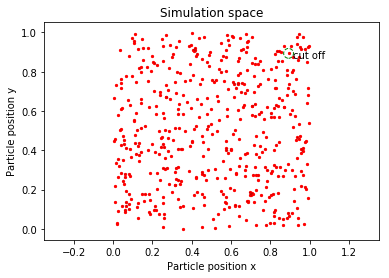

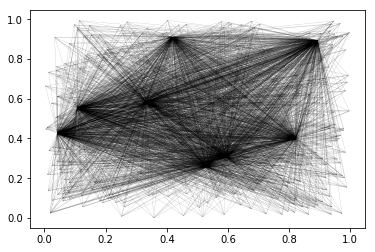

In [168]:
domain = [0,1]
numpy.random.seed(6)
uniform = lambda p,x :numpy.random.uniform(p, x)

nb = 500

x = [uniform(0.0, 1.0) for _ in range(nb)]
y = [uniform(0.0, 1.0) for _ in range(nb)]

plot_particles(x,y, interaction=True, cutoff=True, save=True, name='example_shortrange-nbody_uniform.pdf')

plot_particles(x,y, interaction=True, cutoff=True, cutoff_radius=1000, save=True, name='example_longrange-nbody_uniform.pdf')



## Non-uniform particle distribution in a 1-by-1 space
Non-uniform distribution (i.e., four gaussian (x&y) distributions), 
the interactions are illustrated by dashed lines and the cutoff radius is highlighted in green. 

Total number of particle generated:  300


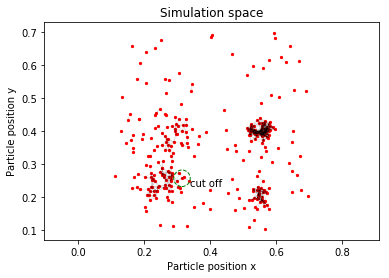

In [171]:
domain = [0,1]
numpy.random.seed(6)
normal = lambda p,x :numpy.random.normal(p, x)

uni = lambda: int(numpy.random.uniform(30,70))

nb = uni()
x = [normal(0.25, 0.035) for _ in range(nb)]
y = [normal(0.25, 0.035) for _ in range(nb)]

nb = uni()
x.extend([normal(0.55, 0.02) for _ in range(nb)])
y.extend([normal(0.2, 0.025) for _ in range(nb)])

nb = uni()
x.extend([normal(0.55, 0.02) for _ in range(nb)])
y.extend([normal(0.4, 0.02) for _ in range(nb)])

nb = uni()
x.extend([normal(0.28, 0.04) for _ in range(nb)])
y.extend([normal(0.4, 0.04) for _ in range(nb)])

rest = 300-len(x)
x.extend([uniform(0.1, 0.7) for _ in range(rest)])
y.extend([uniform(0.1, 0.7) for _ in range(rest)])

plot_particles(x,y, interaction=True, cutoff=True, save=True, name='example_nbody_non_uniform.pdf')

print 'Total number of particle generated: ', len(x)


Total number of particle generated:  500


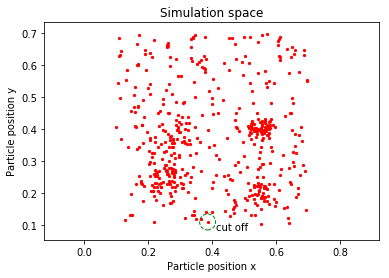

In [11]:
domain = [0,1]
numpy.random.seed(6)

normal = lambda p,x :numpy.random.normal(p, x)
uniform= lambda p,x :numpy.random.uniform(p, x)

uni = lambda: int(numpy.random.uniform(30,70))

nb = uni()
x = [normal(0.25, 0.035) for _ in range(nb)]
y = [normal(0.25, 0.035) for _ in range(nb)]

nb = uni()
x.extend([normal(0.55, 0.02) for _ in range(nb)])
y.extend([normal(0.2, 0.025) for _ in range(nb)])

nb = uni()
x.extend([normal(0.55, 0.02) for _ in range(nb)])
y.extend([normal(0.4, 0.02) for _ in range(nb)])

nb = uni()
x.extend([normal(0.28, 0.04) for _ in range(nb)])
y.extend([normal(0.4, 0.04) for _ in range(nb)])

rest = 500-len(x)
x.extend([uniform(0.1, 0.7) for _ in range(rest)])
y.extend([uniform(0.1, 0.7) for _ in range(rest)])

plot_particles(x,y, interaction=False, cutoff=True, cutoffid=300, save=True, name='example_nbody_non_uniform_clean.pdf')

print 'Total number of particle generated: ', len(x)

Total number of particle generated:  200


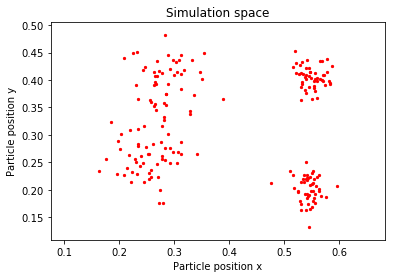

In [284]:
domain = [0,1]
numpy.random.seed(6)

normal = lambda p,x :numpy.random.normal(p, x)
uniform= lambda p,x :numpy.random.uniform(p, x)

uni = lambda: 50#int(numpy.random.uniform(30,70))

nb = uni()
x = [normal(0.25, 0.035) for _ in range(nb)]
y = [normal(0.25, 0.035) for _ in range(nb)]

nb = uni()
x.extend([normal(0.55, 0.02) for _ in range(nb)])
y.extend([normal(0.2, 0.025) for _ in range(nb)])

nb = uni()
x.extend([normal(0.55, 0.02) for _ in range(nb)])
y.extend([normal(0.4, 0.02) for _ in range(nb)])

nb = uni()
x.extend([normal(0.28, 0.04) for _ in range(nb)])
y.extend([normal(0.4, 0.04) for _ in range(nb)])

rest = 500-len(x)
#x.extend([uniform(0.1, 0.7) for _ in range(rest)])
#y.extend([uniform(0.1, 0.7) for _ in range(rest)])

plot_particles(x,y, interaction=False, cutoff=False, cutoffid=300, save=True, name='example_nbody_non_uniform_clean_RCB.pdf')

print 'Total number of particle generated: ', len(x)

In [187]:
def get_median(A, i):
    #divide A into sublists of len 5
    sublists = [A[j:j+5] for j in range(0, len(A), 5)]
    medians = [sorted(sublist)[len(sublist)/2] for sublist in sublists]
    if len(medians) <= 5:
        pivot = sorted(medians)[len(medians)/2]
    else:
        #the pivot is the median of the medians
        pivot = median_of_medians(medians, len(medians)/2)

    #partitioning step
    low = [j for j in A if j < pivot]
    high = [j for j in A if j > pivot]

    k = len(low)
    if i < k:
        return median_of_medians(low,i)
    elif i > k:
        return median_of_medians(high,i-k-1)
    else: #pivot = k
        return pivot

def get_median_with_index(data):
    sorted(data)[len(data)/2]
    
from math import log
log2 = lambda v: log(v)/log(2)

def RCB2D(x, y, part):
    points = zip(x,y)
    
    def bisect(points, dim):
        points.sort(key=lambda el: el[dim])
        median = points[int(len(points)/2)]
        idx_median = int(len(points)/2)
        b1, b2 = (points[:idx_median], points[idx_median:])
        return (median, idx_median, b1, b2)      
    
    d = [points] #start from full domain
    info = []
    for depth in range(int(log2(part))): #for each depth/dim
        dim = (depth) % 2 #dim = x first then y then x ...
        v = [bisect(section, dim) for section in d] #for each subsection...
        d = []
        for i in v:
            d.extend([i[2], i[3]])
        info.extend(v)
    return info #cutting list

In [ ]:
from pprint import pprint
px = [1,2,3,4,5,6,7,8,9]
py = [1,2,3,4,5,6,7,8,9]

points = zip(px,py)

p2 = [2**i for i in range(int(log2(4)))]

parent = lambda i: int((i-1)/2)
left   = lambda i: int(2*i + 1)
right  = lambda i: int(2*i + 2)

elem_at_dim = lambda dim: 2**(dim)
which_depth = lambda idx: int(log2(idx+1)) 
which_dim   = lambda idx: which_depth(idx) % 2

def get_cut_start_end_pos(parent_cut, size, parent_dim, left):
    if left==True:
        return (0, parent_cut[parent_dim])
    else:
        return (parent_cut[parent_dim], size)

def plot_cut(where, start_end, dim):
    if dim == 0:
        plt.plot([where, where], [start_end[0], start_end[1]], c='b', linestyle='--', linewidth=0.5)
    else:
        plt.plot([start_end[0], start_end[1]], [where, where], c='b', linestyle='--', linewidth=0.5)

def plot(l, part_info, domain_max):
    ldim = which_depth(l) % 2
    if l == 0:
        se = get_cut_start_end_pos((0,0), domain_max, 0, False)
    else:
        se = get_cut_start_end_pos(part_info[parent(l)][0], domain_max, which_dim(parent(l)), True if l == left(parent(l)) else False)
    linfo = part_info[l]
    
    plot_cut(linfo[0][ldim], se, ldim)
    g = left(l)
    d = right(l)
    if g < len(part_info):
        plot(g, part_info, domain_max)
    if d < len(part_info):
        plot(d, part_info, domain_max)
        
nb = 1000
x = [normal(0.25, 0.035) for _ in range(nb)]
y = [normal(0.25, 0.035) for _ in range(nb)]

part_info = RCB2D(x, y, 4)
root = part_info[0]
n = 0
domain = 9
print((part_info[0][0]))
print(len(part_info[0][3]))

plot_particles(x,y, interaction=False, fig=fig, cutoff=False, save=False, name='example_nbody_non_uniform_clean_RCB.pdf')
plot(0, part_info, max(max(x), max(y)))


[0 3 1 0 2 3 1 3 2 2 0 1 0 2 2 1 3 0 3 3 2 1 2 3 2]


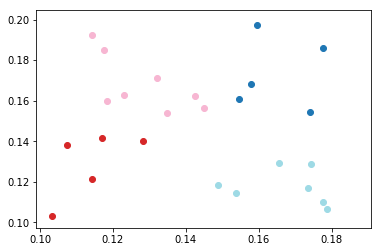

In [128]:
from sklearn.cluster import KMeans

nb_cluster = 4
kmeans = KMeans(n_clusters=nb_cluster)

X= zip(x,y)

cluster = kmeans.fit_predict(X)
cmap = get_cmap(nb_cluster, 'tab20')

for p in zip(X, cluster):
    plt.scatter(p[0][0], p[0][1], c=cmap(p[1]))

labels = kmeans.labels_

print labels

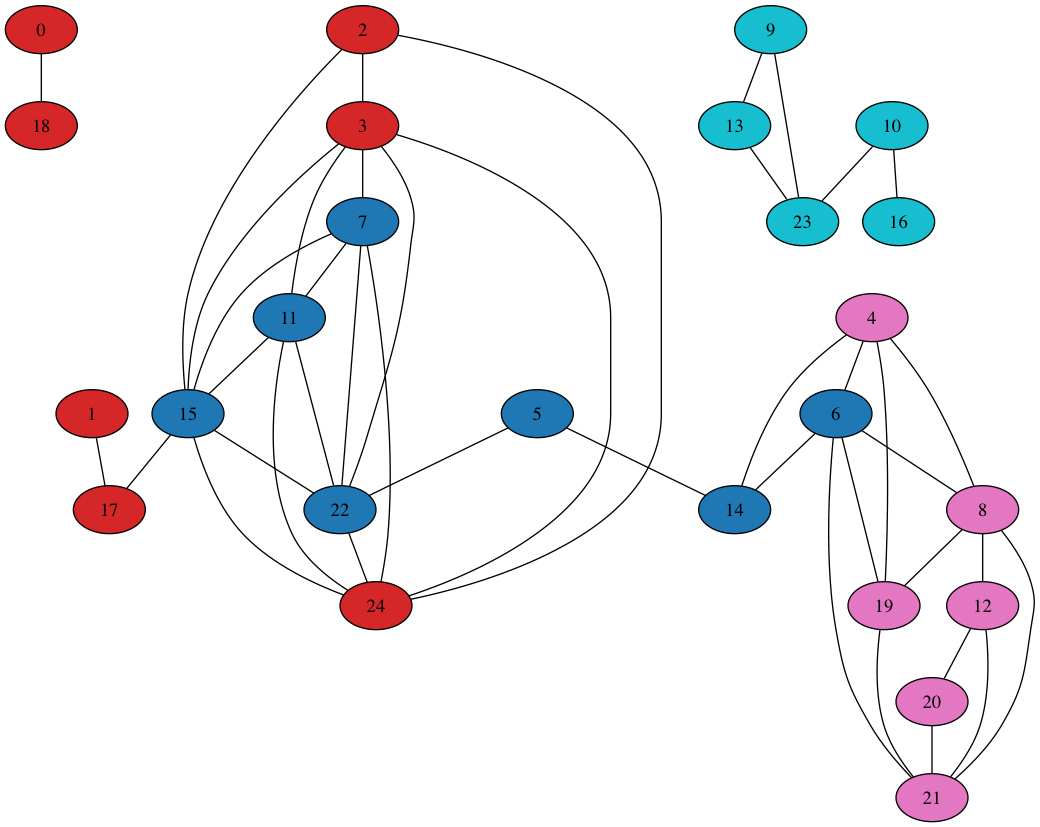

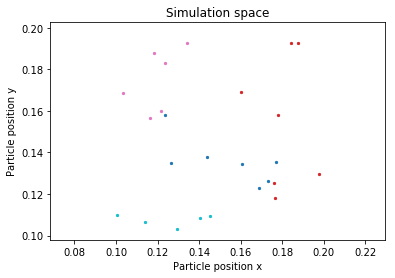

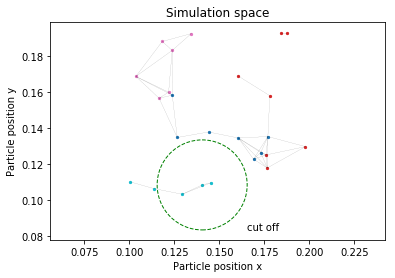

In [163]:
import metis
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
from matplotlib.colors import to_hex 
import matplotlib.patches as mpatch
from random import shuffle
from nxpd import draw

cutoff=2.5*10**-2

normal = lambda p,x :numpy.random.normal(p, x)
uniform= lambda p,x :numpy.random.uniform(p, x)
n = 25

x = [uniform(0.1, 0.2) for _ in range(n)]
y = [uniform(0.1, 0.2) for _ in range(n)]

g = points_to_graph(x, y, 0.025)#points_to_edgelist(x, y, 0.3)

nb_part = 4

(edgecuts, parts) = metis.part_graph(g, nb_part)

overlap = {name for name in mcd.CSS4_COLORS if "xkcd:" + name in mcd.XKCD_COLORS}
colors = get_cmap(nb_part, 'tab10') #['red','blue','green']

ncolors = {}
for i, p in enumerate(parts):
    ncolors[i] = colors(p)
    g.node[i]['style'] = 'filled'
    g.node[i]['fillcolor'] = to_hex(colors(p))
    
plot_particles(x, y, colors=ncolors, interaction=False, cutoff=False, save=True, name="example_graph_part_metis_colored_without_interactions.pdf")
plot_particles(x, y, colors=ncolors, interaction=True,  cutoff=True, save=True, name="example_graph_part_metis_colored_with_interactions.pdf")

v = nx.drawing.nx_pydot.write_dot(g, 'example.dot') # Requires pydot or pygraphviz
draw(g, show='ipynb')

[u'indigo', u'gold', u'violet', u'turquoise', u'yellow', u'lavender', u'yellowgreen', u'crimson', u'navy', u'orangered', u'magenta', u'lime', u'pink', u'lightblue', u'darkblue', u'fuchsia', u'chartreuse', u'black', u'orange', u'white', u'orchid', u'red', u'brown', u'ivory', u'khaki', u'wheat', u'blue', u'salmon', u'chocolate', u'aquamarine', u'maroon', u'olive', u'cyan', u'lightgreen', u'silver', u'tan', u'tomato', u'sienna', u'goldenrod', u'darkgreen', u'plum', u'aqua', u'grey', u'purple', u'green', u'beige', u'teal', u'azure', u'coral']
yellowgreen
yellow
white
wheat
violet
turquoise
tomato
teal
tan
silver
sienna
salmon
red
purple
plum
pink
orchid
orangered
orange
olive
navy
maroon
magenta
lime
lightgreen
lightblue
lavender
khaki
ivory
indigo
grey
green
goldenrod
gold
fuchsia
darkgreen
darkblue
cyan
crimson
coral
chocolate
chartreuse
brown
blue
black
beige
azure
aquamarine
aqua


(0.0, 3.0, 0.0, 50.0)

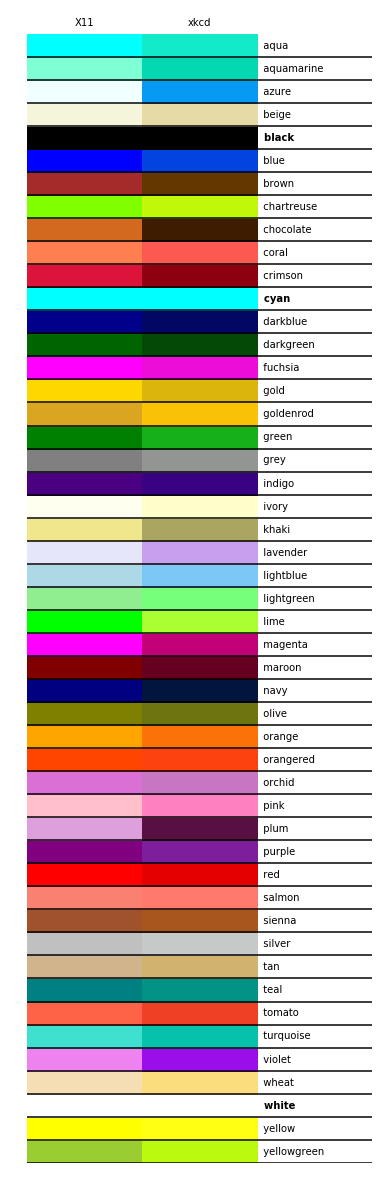

<function keys>

[0, 1]